
### Feature Hypothesis : 

#### What are the expected reletionships of independent variables with review score?
1. order_items_qty ("+") - if consumer gets more than one item from the same seller, it should mean that he/she knows the quality of the good. Therefore, increase in item quantity should increase review score
2. product_description_lenght ("+") - buyer having more information about buying product should have positive relationship with review score
3. product_photos_qty ("+")
4. product_name_lenght ('unknown')- shorter names sometimes can be ambiguous or can be easy to understand,so relationship with review score is unknown at this point
5. delivery_accuracy ("+") - item coming on time or earlier that it was described should have positive relationship with review score
6. order_products_value ("-") - more expensive perhaps means better quality or higher expectation towards order fulfilment;
7. order_freight_value ("-") - more frieght means more expectation towards delivery accuracy


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
#import calendar as cal
#import workalendar
from workalendar.america import Brazil
from datetime import date
from sklearn.cross_validation import train_test_split
%store -r orders_v2

C:\Users\R2D2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
orders_new = orders_v2[['order_items_qty','product_name_lenght','product_description_lenght', 'product_photos_qty',\
                        'order_delivery_before_estimated_date_in_days', 'order_products_value', 'review_score']]
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
order_items_qty                                 100000 non-null int64
product_name_lenght                             100000 non-null int64
product_description_lenght                      100000 non-null int64
product_photos_qty                              100000 non-null int64
order_delivery_before_estimated_date_in_days    97595 non-null float64
order_products_value                            100000 non-null float64
review_score                                    100000 non-null int64
dtypes: float64(2), int64(5)
memory usage: 5.3 MB


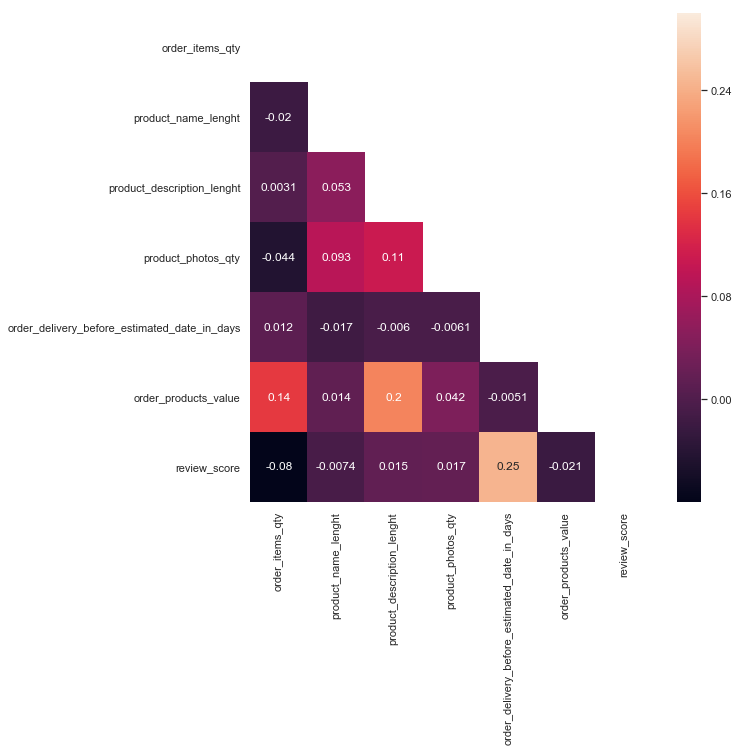

In [3]:
sns.set(font_scale=1)
corr = orders_new.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, annot=True)

Most variables do have quite weak relationship with review score.Lets try fitting this is OLS regression. 

In [4]:
model = sm.OLS.from_formula('review_score ~ order_items_qty + product_name_lenght + product_description_lenght + \
                            product_photos_qty + order_delivery_before_estimated_date_in_days + order_products_value', data=orders_new)

In [5]:
result = model.fit()

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1197.
Date:                Sat, 09 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:46:46   Log-Likelihood:            -1.6176e+05
No. Observations:               97595   AIC:                         3.235e+05
Df Residuals:                   97588   BIC:                         3.236e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        4.0635      0.024    172.695      0.000       4.017       4.110
order_items_qty                                 -0.2464      0.009    -27.231      0.000      -0.264      -0.229
product_name_lenght                             -0.0019      0.000     -4.616      0.000      -0.003      -0.001
product_description_lenght                    4.038e-05   6.29e-06      6.424      0.000    2.81e-05    5.27e-05
product_photos_qty                               0.0106      0.002      4.531      0.000       0.006       0.015
order_delivery_before_estimated_date_in_days     0.0317      0.000     79.803      0.000       0.031       0.033
order_products_value                         -2.767e-05    2.2e-05     -1.261      0.207   -7.07e-05    1.54e-05
==============================================================================
Omnibus:                    17863.435   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29327.189
Skew:                          -1.288   Prob(JB):                         0.00
Kurtosis:                       3.757   Cond. No.                     6.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let’s interpret the table.Overall the model is significiant.

__Prob(F-statistcs)__= 0.000 This is the p-value associated with the F-statistic(F(6,97588)= 1197). It is used in testing the null hypothesis that all of the model coefficients are 0. 

This tells us that there is a significant difference in the group means. 

__Coef.__ : These are the values for the regression equation for predicting the dependent variable from the independent variable. The regression equation is presented in many different ways, for example:

Ypredicted = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4

The column of estimates provides the values for b0, b1, b2, b3 and b4 for this equation. 

   __order_items_qty__:-0.2464	So for every unit increase in order item qianity, a 0.2464 unit decrease in review_score  is
                       predicted, holding all other variables constant. 

   __product_name_lenght__ :-0.0019	for every unit increase in product_name_lenght, a 0.0019 unit decrease in review_score 
                       is predicted, holding all other variables constant. 

   __product_description_lenght__ :4.038e-05 for every unit increase in product_description_lenght, a 4.038e-05 unit increase in
                       review_score  is predicted, holding all other variables constant.

   __product_photos_qty__ :	0.0106	for every unit increase in product_photos_qty, a 0.0106 unit increase in
                       review_score  is predicted, holding all other variables constant.
                       
   __order_delivery_before_estimated_date_in_days__: 0.0317	for every unit increase in order delivery accuracy, a 0.0317 unit 
                       increase in review_score  is predicted, holding all other variables constant.
               
   __order_products_value__ :-2.767e-05	for every unit increase in product_name_lenght, a 2.767e-05 unit decrease in 
                       review_score is predicted, holding all other variables constant. 


Looking at the __p-values__ :
__P>|t|__ – This column shows the 2-tailed p-values used in testing the null hypothesis that the coefficient (parameter) is 0.   Using an alpha of 0.05:

   The coefficient for all the variables is significantly different from 0 because their p-value is 0.000 or smaller than 0.05.This means here's no difference between the means and conclude that a significant difference does exist.
   

All of our independent variables are statistically significant which is a great news.But It's clear that we have to use more informative features to model this problem. 

### Features Engineeering:

The first feature I want to engineer is __Estimated Delivery Time in working days__. 
Gets the days between order approval and estimated delivery date. A customer might be unsatisfied if he is told that the estimated time is big.

After reserching on olist site, it was found out that the most common carrier used for delivery does not deliver on Sunday so we have to consider this while calculating the difference between time of purchase and time of estimated delivery.

The second feature I want is __Estimated Delivery Time in working days__.
Gets the days between order approval and delivered customer date. A customer might be more satisfied if he gets the product faster.

The third feature is __Delivery Time Delta in working days__.
The difference between the actual and estimated date. If negative- order was delivered early, if positive - order was delivered late. A customer might be more satisfied if the order arrives sooner than expected, or unhappy if he receives after the deadline.

The fourth feature is __Is Late__. 
Binary variable indicating if the order was delivered after the estimated date.

The fifth feature is __Average Product Value__
Cheaper products might have lower quality, leaving customers unhappy.

The sixth feature is __Order Freight Ratio__
If a customer pays more for freight, he might expect a better service.

The final feature I want to look at is __Purchase Day of Week__ 
Does it affect how happy are the customers? I do not have a lot of intuition behind this step but I have a feeling this feature may be useful.

In [7]:
orders_v2['order_aproved_at'] = pd.to_datetime(orders_v2['order_aproved_at'])

In [8]:
#from bizdays import Calendar, load_holidays
#holidays = load_holidays('Brazil.txt') # Brazilian financial market holidays
#cal = Calendar(holidays, ['Sunday'], name='Brazil')

In [9]:
#cal.bizdays('2017-03-15','2017-02-01')

In [10]:
cal = Brazil()

In [11]:
def additional_features(df):
    
    df['estimated_delivery_time_wd']=df.apply(lambda x: cal.get_working_days_delta(x.order_aproved_at,x.order_estimated_delivery_date), axis=1)
    df['actual_delivery_time_wd'] = df.apply(lambda x: cal.get_working_days_delta(x.order_aproved_at,x.order_delivered_customer_date), axis=1)
    df['delivery_time_delta_wd'] = df.actual_delivery_time_wd - df.estimated_delivery_time_wd

    df['is_late'] = df.order_delivered_customer_date > df.order_estimated_delivery_date
    
    df['average_product_value'] = df.order_products_value / df.order_items_qty

    df['total_order_value'] = df.order_products_value + df.order_freight_value
        
    df['order_freight_ratio'] = df.order_freight_value / df.order_products_value
        
    df['purchase_dayofweek'] = df.order_purchase_timestamp.dt.dayofweek
    
    return df

In [12]:
def feature_engineering(df):
    df = additional_features(df)
    df = df.drop(['order_id','order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date',\
                  'order_aproved_at','order_estimated_delivery_date','order_delivered_customer_date','customer_id',\
                  'customer_zip_code_prefix', 'product_category_name','product_id', 'review_id', 'customer_city',\
                  'review_comment_title', 'review_comment_message','review_creation_date', \
                  'review_answer_timestamp','order_delivery_before_estimated_date_in_days', 'delta_purch_delivered',\
                  'delta_est_delivered', 'review_length','delayed'], axis=1)
    #df = pd.get_dummies(df, prefix='is')
    return df

In [13]:
orders_FE= feature_engineering(orders_v2)

In [14]:
orders_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
order_status                  100000 non-null object
order_products_value          100000 non-null float64
order_freight_value           100000 non-null float64
order_items_qty               100000 non-null int64
order_sellers_qty             100000 non-null int64
customer_state                100000 non-null object
product_name_lenght           100000 non-null int64
product_description_lenght    100000 non-null int64
product_photos_qty            100000 non-null int64
review_score                  100000 non-null int64
total_order_value             100000 non-null float64
purchase_dayofweek            100000 non-null int64
estimated_delivery_time_wd    100000 non-null int64
actual_delivery_time_wd       100000 non-null int64
delivery_time_delta_wd        100000 non-null int64
is_late                       100000 non-null bool
average_product_value         100000 non-null float

In [15]:
corr_matrix = orders_FE.corr()
corr_matrix['review_score'].sort_values(ascending=False)

review_score                  1.000000
product_photos_qty            0.017267
product_description_lenght    0.015390
average_product_value        -0.003357
product_name_lenght          -0.007359
purchase_dayofweek           -0.008756
order_products_value         -0.020872
order_freight_ratio          -0.024147
total_order_value            -0.027072
estimated_delivery_time_wd   -0.055357
order_freight_value          -0.072316
order_items_qty              -0.079544
order_sellers_qty            -0.137218
delivery_time_delta_wd       -0.170730
actual_delivery_time_wd      -0.238319
is_late                      -0.314073
Name: review_score, dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler
for col in ['order_status','customer_state']:
    orders_FE[col] = orders_FE[col].astype('category')
numerical = ['order_products_value', 'order_freight_value', 'order_items_qty','order_sellers_qty', 'product_name_lenght',\
             'product_description_lenght', 'product_photos_qty', 'review_score','total_order_value', 'purchase_dayofweek',\
             'estimated_delivery_time_wd','actual_delivery_time_wd', 'delivery_time_delta_wd', 'is_late',\
             'average_product_value', 'order_freight_ratio']
X = orders_FE.loc[:,numerical]
st_scaler  = StandardScaler().fit(X.values)
Xscaled = st_scaler.transform(X.values).reshape(X.shape)
Xscaled = pd.DataFrame(Xscaled,columns=numerical)

C:\Users\R2D2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\R2D2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
Xscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
order_products_value          100000 non-null float64
order_freight_value           100000 non-null float64
order_items_qty               100000 non-null float64
order_sellers_qty             100000 non-null float64
product_name_lenght           100000 non-null float64
product_description_lenght    100000 non-null float64
product_photos_qty            100000 non-null float64
review_score                  100000 non-null float64
total_order_value             100000 non-null float64
purchase_dayofweek            100000 non-null float64
estimated_delivery_time_wd    100000 non-null float64
actual_delivery_time_wd       100000 non-null float64
delivery_time_delta_wd        100000 non-null float64
is_late                       100000 non-null float64
average_product_value         100000 non-null float64
order_freight_ratio           100000 non-null float64
dtypes: float64(16)
memory

In [18]:
order_status_var = pd.factorize(orders_FE['order_status'])
orders_FE['order_status'] = order_status_var[0]
definition_list_order_status = order_status_var[1]

customer_state_var = pd.factorize(orders_FE['customer_state'])
orders_FE['customer_state'] = customer_state_var[0]
definition_list_customer_state = customer_state_var[1]


In [19]:
Xscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
order_products_value          100000 non-null float64
order_freight_value           100000 non-null float64
order_items_qty               100000 non-null float64
order_sellers_qty             100000 non-null float64
product_name_lenght           100000 non-null float64
product_description_lenght    100000 non-null float64
product_photos_qty            100000 non-null float64
review_score                  100000 non-null float64
total_order_value             100000 non-null float64
purchase_dayofweek            100000 non-null float64
estimated_delivery_time_wd    100000 non-null float64
actual_delivery_time_wd       100000 non-null float64
delivery_time_delta_wd        100000 non-null float64
is_late                       100000 non-null float64
average_product_value         100000 non-null float64
order_freight_ratio           100000 non-null float64
dtypes: float64(16)
memory

In [20]:
orders_ML = pd.concat([orders_FE[['order_status','customer_state']],Xscaled],axis=1)
orders_ML[['order_status','customer_state']]=orders_ML[['order_status','customer_state']].astype(float)

#### Stratified Split

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
# Stratified Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(orders_ML, orders_ML['review_score']):
    st_train_set = orders_ML.loc[train_index]
    st_test_set = orders_ML.loc[test_index]

In [22]:
st_train_set.shape

(80000, 18)

In [23]:
st_test_set.shape

(20000, 18)

In [24]:
%store st_train_set

Stored 'st_train_set' (DataFrame)


In [25]:
%store orders_ML

Stored 'orders_ML' (DataFrame)


In [26]:
%store st_test_set

Stored 'st_test_set' (DataFrame)
